In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import os
import torch
import pickle
np.random.seed(4)

# Load Results 

In [2]:
## Remove the comments to run the SWAT-SW experiment.
# output_vars = ["SW_ENDmm"]

## Remove the comments to run the SWAT-SNO experiment.
# output_vars = ["SNOmm"]

## Remove the comments to run the SWAT-SF experiment.
output_vars = ["Q_pred_mm"]

In [3]:
output_var = output_vars[0]
if output_var == "SNOmm":
    out_name = "SNO"
    input_vars = ['Date', 'PRECIPmm', 'TMP_MXdgC', 'TMP_MNdgC', 'SOLARMJ/m2', 'WINDM/s', 'RHmd','SNOmm']
elif output_var == "SW_ENDmm":
    out_name = "SW"
    input_vars = ['Date', 'PRECIPmm', 'TMP_MXdgC', 'TMP_MNdgC', 'SOLARMJ/m2', 'WINDM/s', 'RHmd','SW_INITmm']
elif output_var == "Q_pred_mm":
    out_name = "SF"
    input_vars = ['Date', 'PRECIPmm', 'TMP_MXdgC', 'TMP_MNdgC', 'SOLARMJ/m2', 'WINDM/s', 'RHmd','Q_pred_mm']

b_id = 'MN'
if   b_id == '01162500':
    b_name = "01162500 (MA)"
elif b_id == '06614800':
    b_name = "06614800 (CO)"
elif b_id == '12114500':
    b_name = "12114500 (WA)"
elif b_id == '02300700':
    b_name = "02300700 (FL)" 
elif b_id == '11141280':
    b_name = "11141280 (CA)" 
elif b_id == '09066200':
    b_name = "09066200 (CO)"
elif b_id == 'MN':
    b_name = b_id
    
sim_type = 'full_wsl'
input_size = 8
n_steps = 366
run_task = 'synthetic_data_experiments_{}'.format(out_name)
rversion = 'hs32'
# ----------------constants-------------------
res_dir = 'results/head_water_SWAT_1000_years/'
exp_dir = res_dir + '{}/rversion_{}/'.format(run_task, rversion)
if os.path.isdir(exp_dir)==False:
    os.makedirs(exp_dir)

# #--------------------------------------------- load input data -----------------------------
new_data_dir = 'data/1000_year_simulation/'

if sim_type =='full_wsl':
    path = new_data_dir + 'head_water_SWAT_1000_years.csv'
elif sim_type =='nosnow_nofrozen_wsl':
    path = new_data_dir + 'head_water_SWAT_1000_years_no_snow_no_frozen.csv'
elif sim_type =='nosnow_wsl':
    path = new_data_dir + 'head_water_SWAT_1000_years_no_snow.csv'
else:
    raise FileNotFoundError

In [4]:
run_iter=5
# methods_style = [("RMB-IIF",'blue','dotted', 'v'), ("RMB-SSIF",'cornflowerblue','solid','o'),
#            ("TF-TFIF", 'darkgreen', 'dashed', 's'),("SSPL-TFIF", 'lime', 'dotted', 'v'), ("CMB-SCIF", 'aquamarine','solid','o'),
#             ("SMB-SSIF",'gold','dotted','v'), ("SSMB-SSIF",'olive','solid','o'),
#             ("MPTT(delta=0)-SSIF",'coral','dashdot','D'), ("MPTT(delta=1)-SSIF",'salmon','dashed','s'),
#                  ("EnMPTT(delta=0)-SSIF",'red','dotted','v'),("EnMPTT(delta=1)-SSIF",'darkred','solid','o')]
methods_style = [("RMB-IIF",'blue','dotted', 'v'), ("RMB-SSIF",'cornflowerblue','solid','o'),
           ("TF-TFIF", 'darkgreen', 'dashed', 's'),("SSPL-TFIF", 'lime', 'dotted', 'v'), ("CMB-SCIF", 'aquamarine','solid','o'),
            ("SMB-SSIF",'gold','dotted','v'), ("SSMB-SSIF",'olive','solid','o'),
            ("MPTT(delta=0)-SSIF",'coral','dashdot','D'), ("MPTT(delta=1)-SSIF",'salmon','dashed','s')]

In [5]:
mean_rmse_data_list = []
stdv_rmse_data_list = []

In [6]:
# RMB-IIF
path = res_dir + '{}/rversion_{}/'.format('Train_RMB_inf_IIF_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
    
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [7]:
# RMB-SSIF
path = res_dir + '{}/rversion_{}/'.format('Train_RMB_inf_IIF_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [8]:
# TF-TFIF
path = res_dir + '{}/rversion_{}/'.format('Train_TF_inf_TFIF_{}'.format(out_name), rversion)
with open(path+'results_winsize.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [9]:
# SSPL-TFIF
path = res_dir + '{}/rversion_{}/'.format('Train_SSPL_inf_TFIF_{}'.format(out_name), rversion)
with open(path+'results_winsize.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [10]:
# CMB-SCIF
path = res_dir + '{}/rversion_{}/'.format('Train_CMB_inf_SCIF_{}'.format(out_name), rversion)
with open(path+'results_winsize.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [11]:
# SMB-SSIF
path = res_dir + '{}/rversion_{}/'.format('Train_SMB_inf_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [12]:
# SSMB-SSIF
path = res_dir + '{}/rversion_{}/'.format('Train_SSMB_inf_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [13]:
# MPTT(keeper=0)-SSIF
path = res_dir + '{}/rversion_{}/'.format('Train_MPTT_keeper_0_inf_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [14]:
# MPTT(keeper=1)-SSIF
path = res_dir + '{}/rversion_{}/'.format('Train_MPTT_keeper_1_inf_SSIF_{}'.format(out_name), rversion)
with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
    results_data = pickle.load(handle)
mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
mean_rmse_data_list.append(mean_rmse_data)
stdv_rmse_data_list.append(stdv_rmse_data)
print(mean_rmse_data.shape)
print(stdv_rmse_data.shape)

(5, 2)
(5, 2)


In [15]:
path

'results/head_water_SWAT_1000_years/Train_MPTT_keeper_1_inf_SSIF_SF/rversion_hs32/'

In [16]:
# # EnMPTT(keeper=1)-SSIF
# path = res_dir + '{}/rversion_{}/'.format('Train_EnMPTT_keeper_0_inf_SSIF_{}'.format(out_name), rversion)
# with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
#     results_data = pickle.load(handle)
# mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
# stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
# mean_rmse_data_list.append(mean_rmse_data)
# stdv_rmse_data_list.append(stdv_rmse_data)
# print(mean_rmse_data.shape)
# print(stdv_rmse_data.shape)

In [17]:
# # EnMPTT(keeper=1)-SSIF
# path = res_dir + '{}/rversion_{}/'.format('Train_EnMPTT_keeper_1_inf_SSIF_{}'.format(out_name), rversion)
# with open(path+'results_winsize_SSIF.pickle', 'rb') as handle:
#     results_data = pickle.load(handle)
# mean_rmse_data = np.squeeze(results_data['mean_rmse_data'])
# stdv_rmse_data = np.squeeze(results_data['stdv_rmse_data'])
# mean_rmse_data_list.append(mean_rmse_data)
# stdv_rmse_data_list.append(stdv_rmse_data)
# print(mean_rmse_data.shape)
# print(stdv_rmse_data.shape)

In [18]:
mean_rmse_data_list = np.squeeze(mean_rmse_data_list)
stdv_rmse_data_list = np.squeeze(stdv_rmse_data_list)

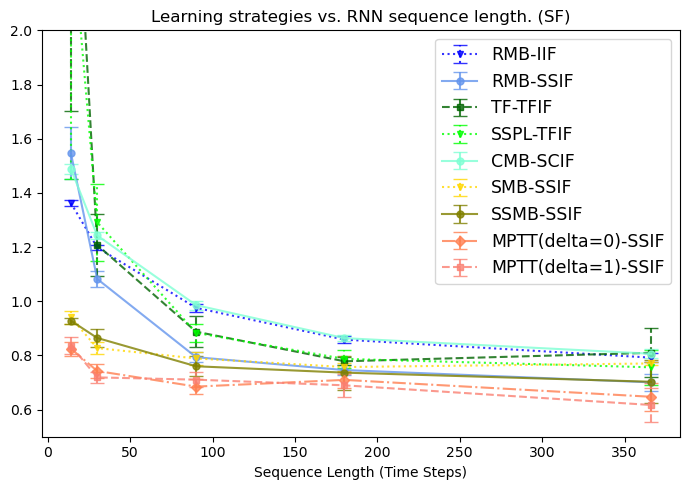

In [19]:
ig,ax = plt.subplots(1,1, figsize=(7,5))
for i in range(len(methods_style)):
    eb=plt.errorbar(mean_rmse_data_list[i,:,0], mean_rmse_data_list[i,:,1], yerr=stdv_rmse_data_list[i,:,1],capsize=5,
                    c=methods_style[i][1],linestyle=methods_style[i][2],marker=methods_style[i][3],markersize=5,
                    alpha=0.8, label=methods_style[i][0])
    eb[-1][0].set_linestyle(methods_style[i][2])
    
ax.set_xlabel('Sequence Length (Time Steps)')
if out_name == "SW":
    ax.set_ylim([10, 50])
    ax.set_ylabel('RMSE')
elif out_name == "SNO":
    ax.set_ylim([1, 10])
elif out_name == "SF":
    ax.set_ylim([0.5, 2.0])
plt.title("Learning strategies vs. RNN sequence length. ({})".format(out_name))
if out_name == 'SF':
    plt.legend(fontsize=12.5, handlelength=2)
plt.tight_layout()
plt.savefig(exp_dir + 'rmses_winsize_{}'.format(out_name), dpi=400)
plt.show()
plt.close()